# Heart Disease Machine Learning Algorithms 
### Vishesh Batta                                              

In [749]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn import metrics, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [750]:
pip install pydotplus 

Note: you may need to restart the kernel to use updated packages.


In [751]:
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

In [752]:
heart= pd.read_csv("C:/Users/vish_/Downloads/Heart Failure Prediction Dataset.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [753]:
heart['Sex']=heart['Sex'].replace(['M', 'F'] ,[0,1])

In [754]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [755]:
heart['RestingECG']=heart['RestingECG'].replace(['Normal', 'ST','LVH'] ,[0,1,2])

In [756]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,0,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,0,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,1,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,0,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,0,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,0,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,0,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,0,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,2,174,N,0.0,Flat,1


In [757]:
heart['ChestPainType']=heart['ChestPainType'].replace(['TA','ATA','NAP','ASY'] ,[0,1,2,3])

In [758]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,N,0.0,Up,0
1,49,1,2,160,180,0,0,156,N,1.0,Flat,1
2,37,0,1,130,283,0,1,98,N,0.0,Up,0
3,48,1,3,138,214,0,0,108,Y,1.5,Flat,1
4,54,0,2,150,195,0,0,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,N,1.2,Flat,1
914,68,0,3,144,193,1,0,141,N,3.4,Flat,1
915,57,0,3,130,131,0,0,115,Y,1.2,Flat,1
916,57,1,1,130,236,0,2,174,N,0.0,Flat,1


In [759]:
heart['ExerciseAngina']=heart['ExerciseAngina'].replace(['N','Y'] ,[0,1])

In [760]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,Up,0
1,49,1,2,160,180,0,0,156,0,1.0,Flat,1
2,37,0,1,130,283,0,1,98,0,0.0,Up,0
3,48,1,3,138,214,0,0,108,1,1.5,Flat,1
4,54,0,2,150,195,0,0,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,Flat,1
914,68,0,3,144,193,1,0,141,0,3.4,Flat,1
915,57,0,3,130,131,0,0,115,1,1.2,Flat,1
916,57,1,1,130,236,0,2,174,0,0.0,Flat,1


In [761]:
heart['Sex'].value_counts(dropna=False)

0    725
1    193
Name: Sex, dtype: int64

In [762]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 86.2+ KB


In [763]:
X= heart[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina']]
y= heart[['HeartDisease']]


# Naive bayes

In [764]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [765]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [766]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [767]:
gnb.fit(x_train, y_train)

C:\Users\vish_\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [768]:
y_pred = gnb.predict(x_test)

In [769]:
from sklearn.metrics import confusion_matrix
cm_gnb = confusion_matrix(y_test, y_pred)
print(cm_gnb)

[[103  24]
 [ 31 118]]


In [770]:
print(metrics.accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.8007246376811594
Accuracy: 80.07%


In [851]:
TP = cm_gnb[0,0]
TN = cm_gnb[1,1]
FP = cm_gnb[0,1]
FN = cm_gnb[1,0]

In [774]:
Accuracy = ((TP+TN)/(TP+FP+FN+TN))*100
print('Accuracy%') 
print(Accuracy)
Precision = TP/(TP+FP)
print('Precision')
print(Precision)
Recall = TP/(TP+FN)
print('Recall')
print(Recall)

Accuracy%
80.07246376811594
Precision
0.8110236220472441
Recall
0.7686567164179104


In [775]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       127
           1       0.83      0.79      0.81       149

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



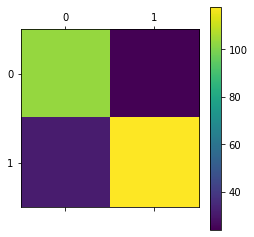

In [776]:
plt.matshow(cm_gnb)
plt.colorbar()
plt.show()

In [777]:
F_score = 2/((1/Precision)+(1/Recall))
print('F_score_GNB=', F_score)
f_score_GNB_scaled = (2*(Precision*Recall))/(Recall+Precision)
print(f_score_GNB_scaled)

F_score_GNB= 0.7892720306513409
0.789272030651341


In [778]:
from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa Score')
print(cohen_kappa_score(y_test, y_pred))

Cohen Kappa Score
0.6005263157894736


In [779]:
y_pred_prob = gnb.predict_proba(x_test)[:,1]

Text(0, 0.5, 'Frequency')

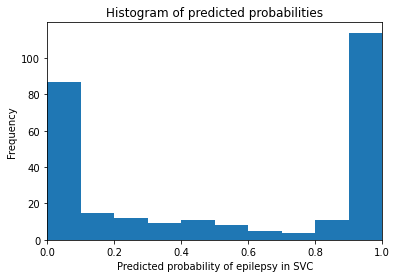

In [780]:
plt.hist(y_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of epilepsy in SVC')
plt.ylabel('Frequency')


### Dropping Columns

In [783]:
heart_new=heart.drop(['Oldpeak', 'ST_Slope'], axis=1)

In [784]:
heart_new

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease
0,40,0,1,140,289,0,0,172,0,0
1,49,1,2,160,180,0,0,156,0,1
2,37,0,1,130,283,0,1,98,0,0
3,48,1,3,138,214,0,0,108,1,1
4,54,0,2,150,195,0,0,122,0,0
...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1
914,68,0,3,144,193,1,0,141,0,1
915,57,0,3,130,131,0,0,115,1,1
916,57,1,1,130,236,0,2,174,0,1


# Logistic Regression

In [796]:
x1=heart_new.drop(['HeartDisease'], axis=1)
y1=heart_new['HeartDisease']
x1.shape, y1.shape

((918, 9), (918,))

In [797]:
heart_new_test=heart_new.sample(n=10)
x1_test=heart_new_test.drop(['HeartDisease'], axis=1)
y1_test=heart_new_test['HeartDisease']

In [798]:
y1_pred=model_tree.predict(x1_test)

In [799]:
print(y1_pred)
y1_test

[0 0 1 1 0 1 1 0 0 0]


233    0
130    0
330    1
451    1
789    0
221    1
624    1
173    0
178    0
287    0
Name: HeartDisease, dtype: int64

In [800]:
wrong_pred=(y1_test !=y1_pred).sum()
print("Total wrong detected = {}" .format(wrong_pred))

accuracy=metrics.accuracy_score(y1_test,y1_pred)
print("Accuracy of this model = {:.3f}".format(accuracy))

Total wrong detected = 0
Accuracy of this model = 1.000


In [801]:
sum(heart_new.duplicated())

0

In [802]:
X2 = heart_new.iloc[:,heart_new.columns != 'HeartDisease']
y2 = heart_new.HeartDisease

In [803]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
X2, y2, test_size=0.3, random_state=5, stratify=y)

In [804]:
scaler = preprocessing.StandardScaler().fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)

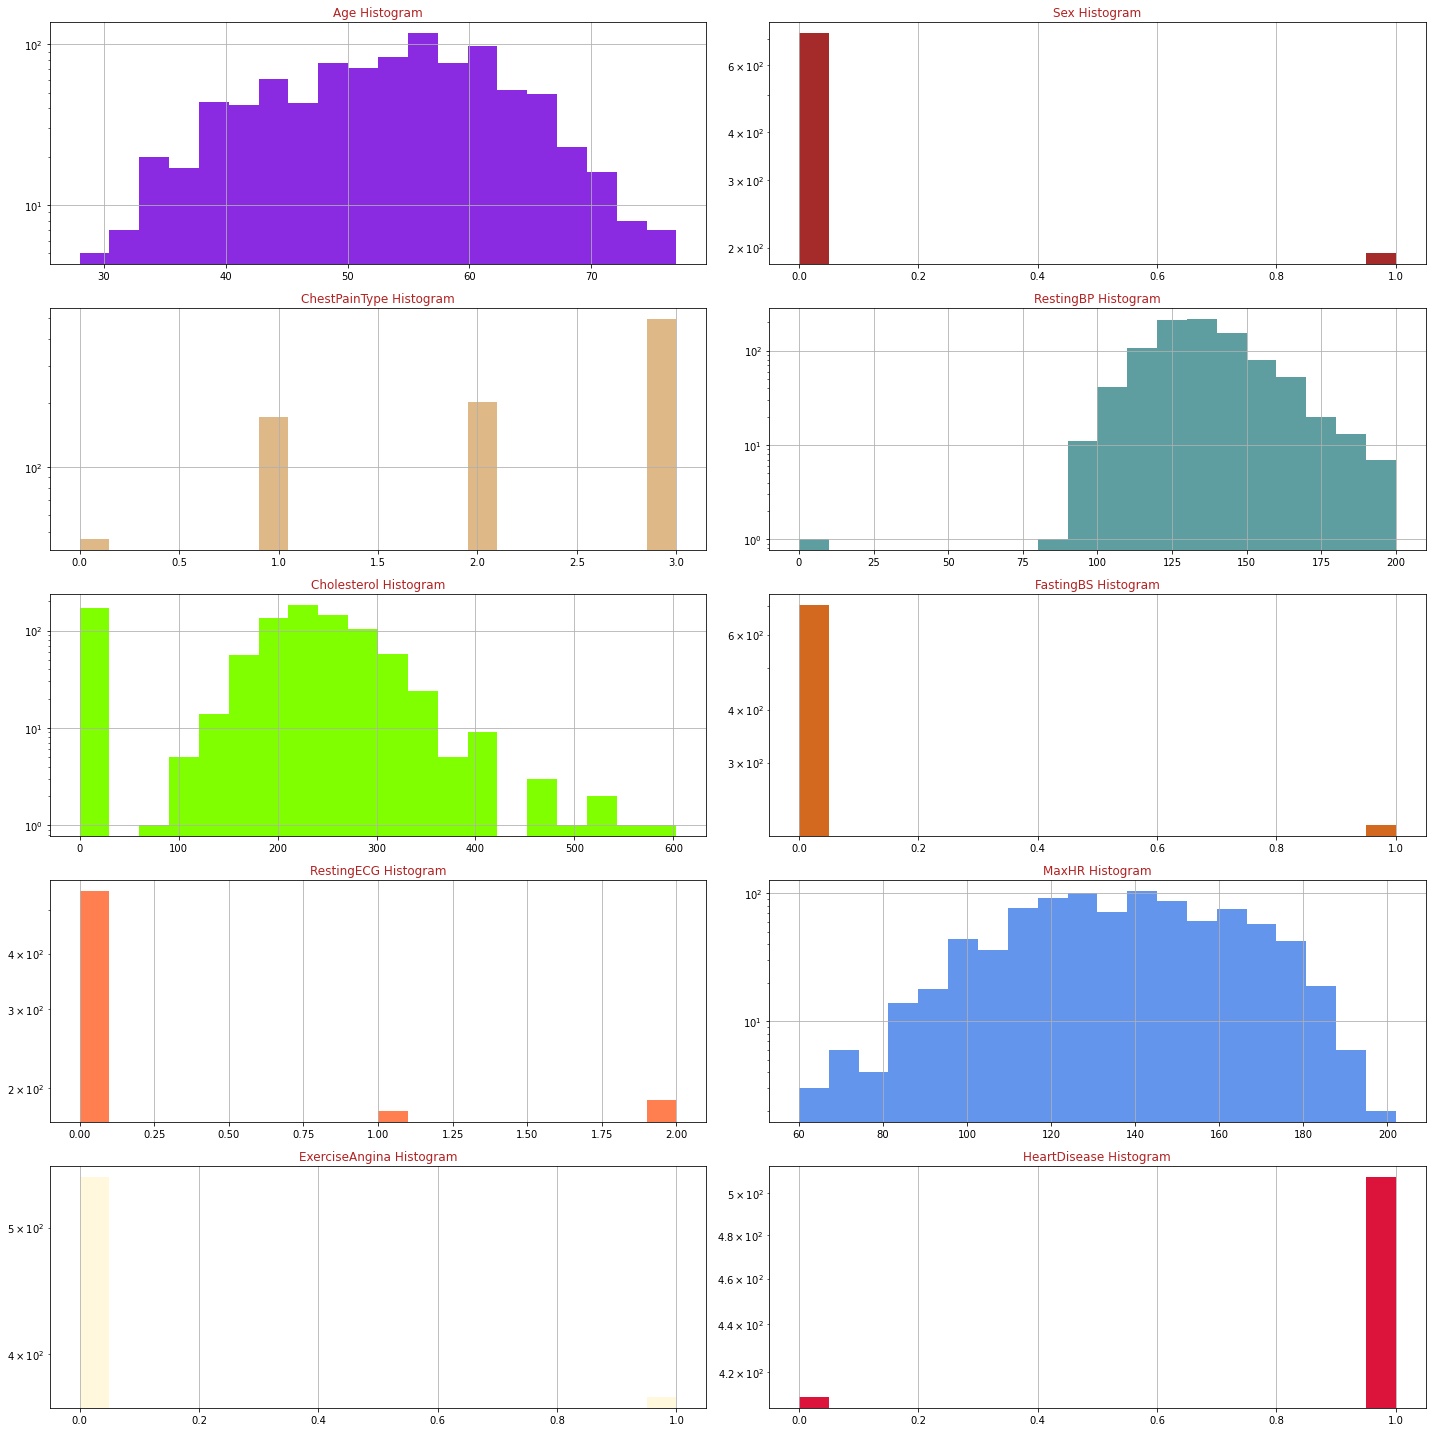

In [805]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(heart_new,heart_new.columns,5,2)

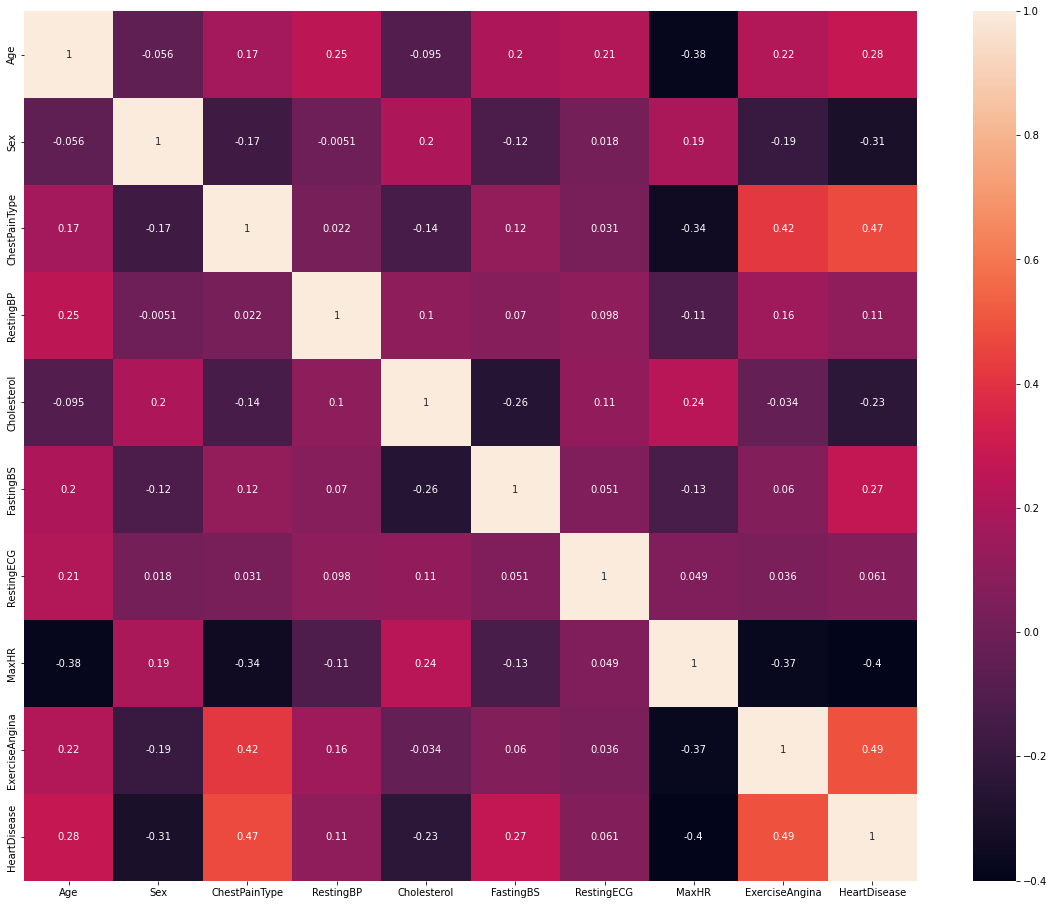

In [806]:
plt.figure(figsize = (20,16))
sns.heatmap(heart_new.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [807]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [808]:
model = LogisticRegression()

In [809]:
model.fit(X2_train_scaled, y2_train)

LogisticRegression()

In [810]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = nb.predict(X2_test)

In [811]:
cm2=confusion_matrix(y2_test, y2_pred)
print ("Confusion Matrix")
print(cm2)

Confusion Matrix
[[94 29]
 [72 81]]


In [812]:
train_acc = model.score(X2_train_scaled, y2_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 79.90654205607477


In [813]:
print(metrics.accuracy_score(y2_test, y2_pred))
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.6340579710144928
Accuracy: 63.41%


In [814]:
test_acc = accuracy_score(y2_test, y2_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 63.40579710144928


In [815]:
from sklearn.metrics import classification_report

In [816]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       123
           1       0.74      0.53      0.62       153

    accuracy                           0.63       276
   macro avg       0.65      0.65      0.63       276
weighted avg       0.66      0.63      0.63       276



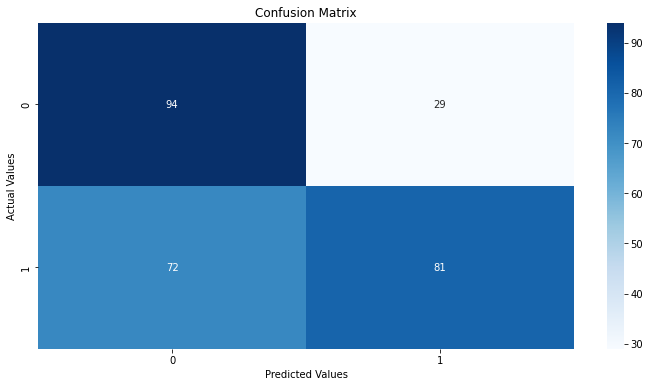

In [817]:
cm2=confusion_matrix(y2_test,y2_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm2, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# K-Nearest Neighbors

In [818]:
from sklearn.svm import SVC


In [819]:
heart_new

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease
0,40,0,1,140,289,0,0,172,0,0
1,49,1,2,160,180,0,0,156,0,1
2,37,0,1,130,283,0,1,98,0,0
3,48,1,3,138,214,0,0,108,1,1
4,54,0,2,150,195,0,0,122,0,0
...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1
914,68,0,3,144,193,1,0,141,0,1
915,57,0,3,130,131,0,0,115,1,1
916,57,1,1,130,236,0,2,174,0,1


In [820]:
x3=heart_new.drop(['HeartDisease'], axis=1)
y3=heart_new['HeartDisease']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.3)

In [821]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x1_train, y1_train)

SVC(kernel='linear')

In [822]:
y3_pred = svclassifier.predict(x3_test)
print(y3_pred)

[1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1]


In [823]:
heart_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   HeartDisease    918 non-null    int64
dtypes: int64(10)
memory usage: 71.8 KB


In [824]:
X3=heart_new.iloc[:,0:9]

In [825]:
X3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina
0,40,0,1,140,289,0,0,172,0
1,49,1,2,160,180,0,0,156,0
2,37,0,1,130,283,0,1,98,0
3,48,1,3,138,214,0,0,108,1
4,54,0,2,150,195,0,0,122,0
...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0
914,68,0,3,144,193,1,0,141,0
915,57,0,3,130,131,0,0,115,1
916,57,1,1,130,236,0,2,174,0


In [826]:
X3=X3.values

In [827]:
X3

array([[ 40,   0,   1, ...,   0, 172,   0],
       [ 49,   1,   2, ...,   0, 156,   0],
       [ 37,   0,   1, ...,   1,  98,   0],
       ...,
       [ 57,   0,   3, ...,   0, 115,   1],
       [ 57,   1,   1, ...,   2, 174,   0],
       [ 38,   0,   2, ...,   0, 173,   0]], dtype=int64)

In [828]:
Y3=heart_new.iloc[:,-1].values

In [829]:
from sklearn.model_selection import train_test_split

In [830]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3, test_size=0.3, random_state=15)

In [831]:
from sklearn.neighbors import KNeighborsClassifier

In [832]:
KNN= KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1,)

In [833]:
KNN.fit(X3_train,Y3_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [834]:
Y3_pred=KNN.predict(X3_test)

In [835]:
from sklearn.metrics import classification_report, confusion_matrix

In [836]:
print(classification_report(Y3_test.reshape(-1,1),Y3_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       120
           1       0.73      0.73      0.73       156

    accuracy                           0.70       276
   macro avg       0.69      0.69      0.69       276
weighted avg       0.70      0.70      0.70       276



In [837]:
from sklearn.model_selection import cross_val_score

In [838]:
print('Cross val', cross_val_score(KNN,Y3_test.reshape(-1,1),Y3_pred, cv=10))
print('Cross val', np.mean(cross_val_score(KNN,Y3_test.reshape(-1,1),Y3_pred)))

Cross val [0.67857143 0.57142857 0.57142857 0.57142857 0.25       0.57142857
 0.55555556 0.55555556 0.55555556 0.55555556]
Cross val 0.6156493506493506


# Support Vector Machine

In [839]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', probability=True, random_state = 0)
classifier.fit(X3_train, Y3_train)

SVC(probability=True, random_state=0)

In [840]:
pred_svm = classifier.predict(X3_test)
pred = [round(value) for value in pred_svm]

In [841]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(Y3_test, pred)
print(cm3)

[[ 86  34]
 [ 47 109]]


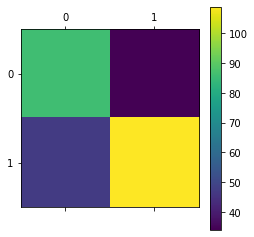

In [842]:
plt.matshow(cm3)
plt.colorbar()
plt.show()

In [843]:
from sklearn import metrics
print(metrics.accuracy_score(Y3_test, pred_svm))
accuracy = accuracy_score(Y3_test, pred_svm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.7065217391304348
Accuracy: 70.65%


In [844]:
TP3 = cm3[0,0]
TN3 = cm3[1,1]
FP3 = cm3[0,1]
FN3 = cm3[1,0]

In [845]:
TP3, TN3, FP3, FN3

(86, 109, 34, 47)

In [846]:
Accuracy = ((TP3+TN3)/(TP3+FP3+FN3+TN3))*100
print('Accuracy%') 
print(Accuracy)
Precision3 = TP3/(TP3+FP3)
print('Precision')
print(Precision3)
Recall3 = TP3/(TP3+FN3)
print('Recall')
print(Recall3)

Accuracy%
70.65217391304348
Precision
0.7166666666666667
Recall
0.6466165413533834


In [847]:
F_score_SVC = 2/((1/Precision3)+(1/Recall3))
print(F_score_SVC)
f_score_SVC = (2*(Precision3*Recall3))/(Recall3+Precision3)
print(f_score_SVC)

0.6798418972332017
0.6798418972332015


In [848]:
from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa Score')
print(cohen_kappa_score(Y3_test, pred))

Cohen Kappa Score
0.41025641025641024


In [849]:
Y_pred_prob = classifier.predict_proba(X_test)[:,1]

C:\Users\vish_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Frequency')

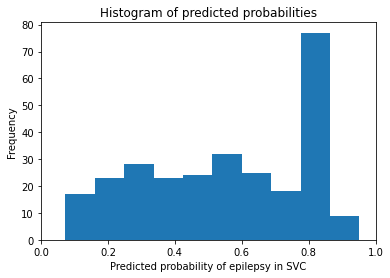

In [850]:
plt.hist(Y_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of epilepsy in SVC')
plt.ylabel('Frequency')